# Return and Risk of a Single Stock

In this notebook, I demonstrate how to calculate the return and risk of a single stock using data from either google, yahoo finance or IEX (Investors Exchange). 

I first download the data into a pandas dataframe. From the closing price, I calculate the returns. The mean and variance of the daily returns are then annualized to calculate the annual return and volatility of the stock.

I calculate the log returns, defined as:
$$
ln(\frac{P_t}{P_{t-1}})
$$

Additionally, I demonstrate the following visualizations to better understand the performance of the stock:
1. The price evolution over time.
2. The daily returns
3. Normality test of the log-returns (Since a lot of option pricing models use the assumption that the stock price is log-normal, we would test out a simple visual test of that assumption here)

For this example we choose Microsoft (ticker:'MSFT') stock and download the closing data from IEX for the period of 01-01-2014 to 31-12-2018. 

I also encourage you to check out the IEX website and find out more about Brad Katsuyama. He is an amazing guy who is very passionate about the creation of this exchange.


### Loading the necessary packages:


In [11]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

### Loading the data into a pandas dataframe

In [2]:
MSFT = wb.DataReader('MSFT', data_source='iex', start='2014-1-1', end='2018-12-31')
MSFT.head() # to print the first few lines (default five)


,open,high,low,close,volume
date,,,,,
2014-03-18,34.0361,35.4951,34.0005,35.1837,64063866
2014-03-19,35.1125,35.1837,34.6144,34.9346,35597241
2014-03-20,34.9168,36.1614,34.9079,35.8776,59269801
2014-03-21,36.2245,36.4203,35.5929,35.7264,80731942
2014-03-24,35.8865,36.1534,35.4595,36.0288,46098374


### Calculating the daily returns, mean annual return, mean annual volatility

We calculate the daily returns and save it into a Pandas dataframe
The mean annual return = 250 times the mean daily return. The number of trading days is approximated as 250.
The daily volatility is the standard deviation of the daily returns. 
Annual volatility = daily volatility x $\sqrt{250}$

In [3]:
MSFT_ret = np.log(MSFT['close']/MSFT['close'].shift(1))

daily_ret = MSFT_ret.mean()
print('The daily return is {0:.3f} %'.format(daily_ret*100))

annual_ret = daily_ret*250 
print('The annual return is {0:.3f} %'.format(annual_ret*100))

daily_vol = np.sqrt(MSFT_ret.var())
print('The daily volatility is {0:.3f} %'.format(daily_vol*100))

annual_vol = daily_vol*np.sqrt(250)
print('The annual volatility is {0:.3f} %'.format(annual_vol*100))


The daily return is 0.088 %
The annual return is 21.889 %
The daily volatility is 1.458 %
The annual volatility is 23.056 %


### Visualizations


Text(0.5,0,'Date')

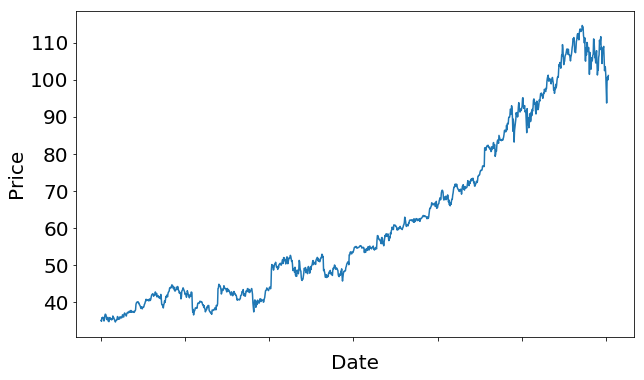

In [21]:
MSFT['close'].plot(fontsize = 20, figsize=(10,6))
plt.ylabel('Price', size = 20)
plt.xlabel('Date', size = 20, labelpad = 10)

Text(0.5,0,'Date')

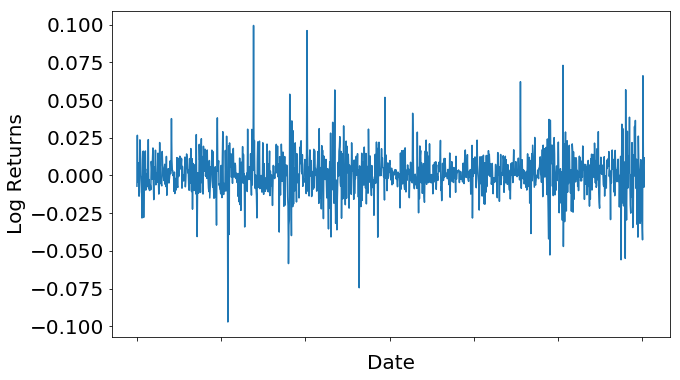

In [23]:
MSFT_ret.plot(fontsize = 20, figsize=(10,6))
plt.ylabel('Log Returns', size = 20)
plt.xlabel('Date', size = 20, labelpad = 10)

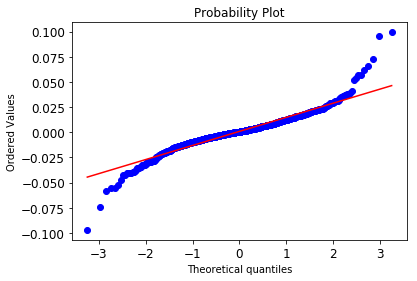

In [24]:
from scipy import stats

MSFT_ret = MSFT_ret.iloc[1:]
stats.probplot(MSFT_ret, dist= "norm", plot=plt)
plt.tick_params(axis='both', labelsize= 12)